import libraries

In [14]:
import pandas as pd

upload your file which is dataset file here we used TATA's online retail data set file

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail Data Set.csv.zip to Online Retail Data Set.csv (2).zip


Reading the file .before read ensure that you uploaded the dataset.

In [16]:
df = pd.read_csv("Online Retail Data Set.csv.zip", encoding='ISO-8859-1', compression='zip')

In [17]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [18]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

In [20]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [21]:
df['Description'] = df['Description'].str.strip().str.lower()

In [22]:
df.to_csv("Online_Retail_Cleaned.csv", index=False)

In [23]:
files.download("Online_Retail_Cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of each column
print("\nData types:")
print(df.dtypes)

# Display descriptive statistics
print("\nDescriptive statistics:")
display(df.describe(include='all'))

Shape of the DataFrame: (406829, 9)

Data types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object

Descriptive statistics:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829,406829.000000
unique,22190,3684,3885,NaN,NaN,NaN,NaN,37,NaN
top,576339,85123A,white hanging heart t-light holder,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542,2077,2070,NaN,NaN,NaN,NaN,361878,NaN
mean,NaN,NaN,NaN,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,NaN,20.401854
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,-168469.600000
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,NaN,4.200000
50%,NaN,NaN,NaN,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,NaN,11.100000
75%,NaN,NaN,NaN,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,NaN,19.500000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN,168469.600000


EDA

Saving Online_Retail_Cleaned (1).csv to Online_Retail_Cleaned (1) (1).csv


/tmp/ipython-input-25-4079157158.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, ax=axs[0], palette="Blues_d")
/tmp/ipython-input-25-4079157158.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, ax=axs[1], palette="Greens_d")


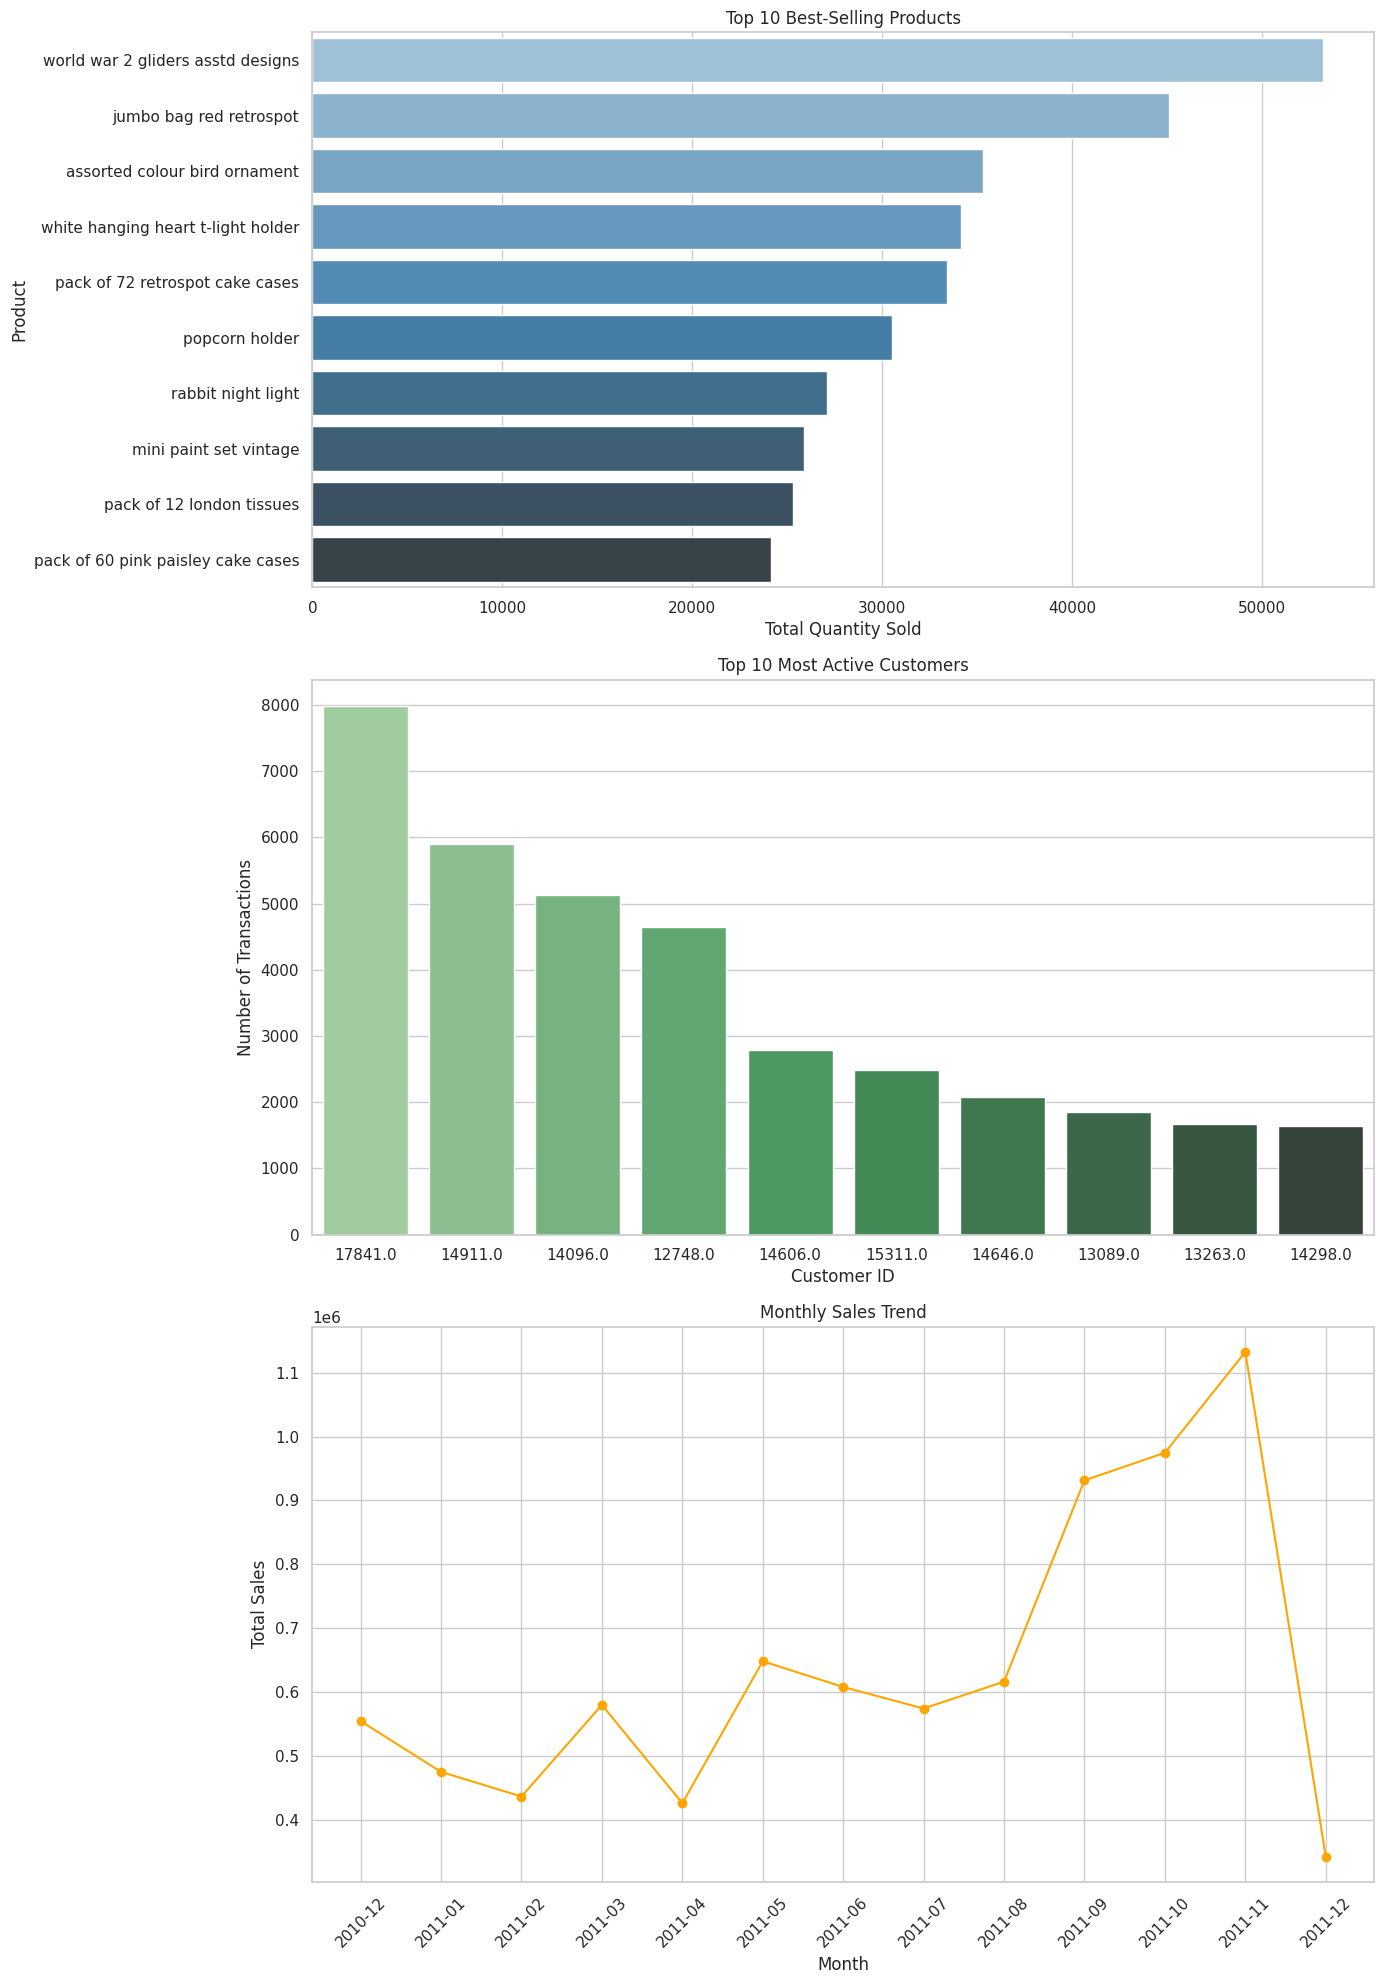

In [25]:
# 📦 STEP 1: Install necessary packages (if not already)
!pip install pandas matplotlib seaborn

# 📥 STEP 2: Upload the cleaned file
from google.colab import files
uploaded = files.upload()  # Upload 'Online_Retail_Cleaned.csv'

# 📄 STEP 3: Load the CSV
import pandas as pd
df = pd.read_csv("Online_Retail_Cleaned.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # ensure datetime format

# 📊 STEP 4: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 1️⃣ Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# 2️⃣ Most active customers
top_customers = df['CustomerID'].value_counts().head(10)

# 3️⃣ Monthly sales trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

# 📈 STEP 5: Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 20))

# Plot 1: Top Products
sns.barplot(x=top_products.values, y=top_products.index, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 10 Best-Selling Products')
axs[0].set_xlabel('Total Quantity Sold')
axs[0].set_ylabel('Product')

# Plot 2: Top Customers
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, ax=axs[1], palette="Greens_d")
axs[1].set_title('Top 10 Most Active Customers')
axs[1].set_xlabel('Customer ID')
axs[1].set_ylabel('Number of Transactions')

# Plot 3: Monthly Sales Trend
monthly_sales.index = monthly_sales.index.astype(str)
axs[2].plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='orange')
axs[2].set_title('Monthly Sales Trend')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Total Sales')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Visualizations & Dashboard

/tmp/ipython-input-6-2408345418.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


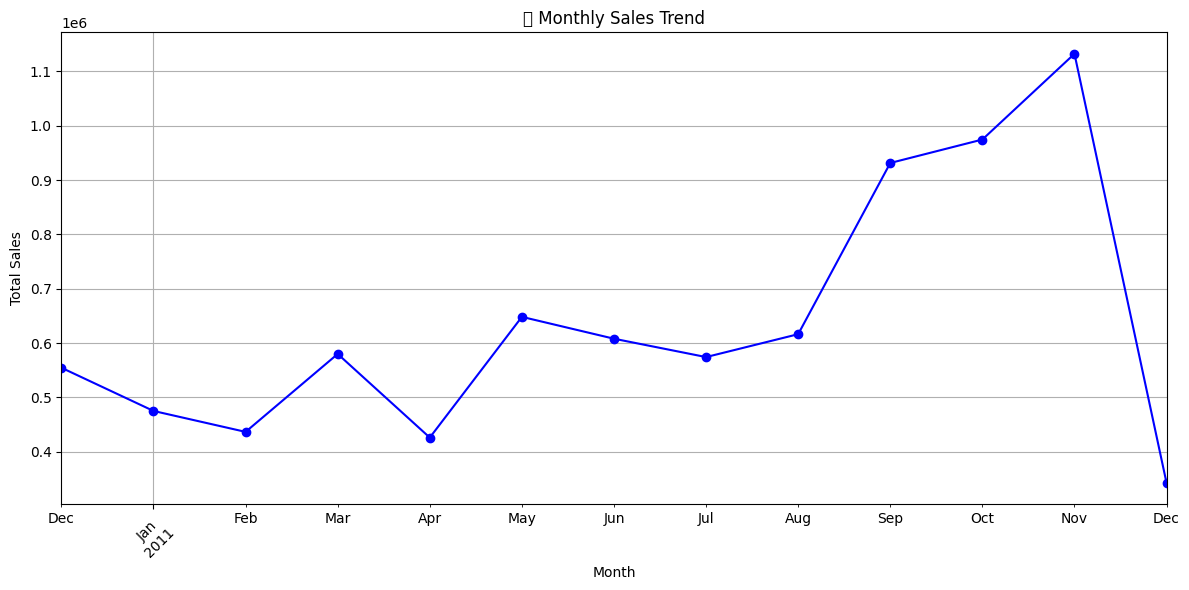

/tmp/ipython-input-6-2408345418.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


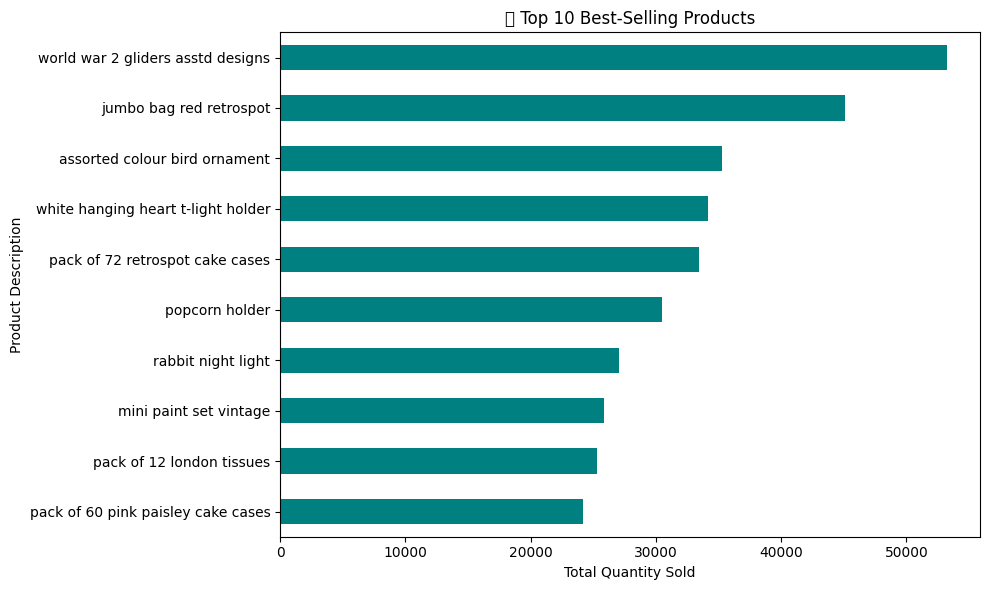

/tmp/ipython-input-6-2408345418.py:57: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


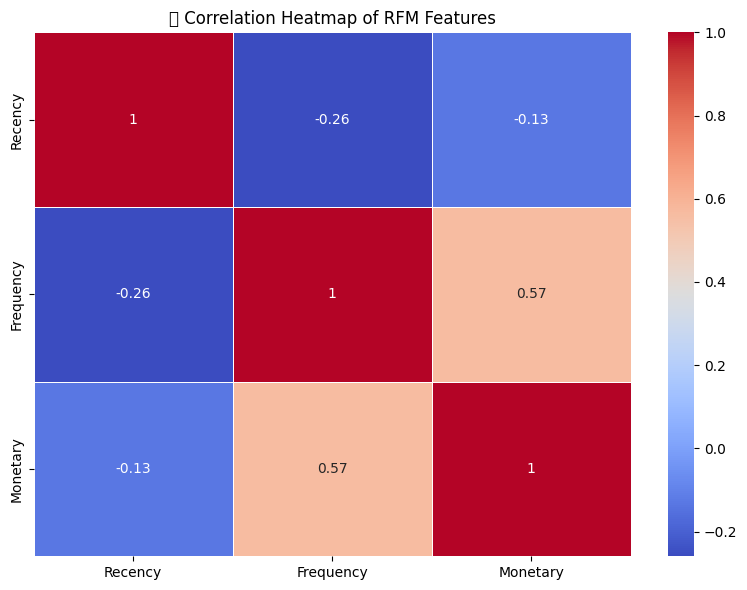

In [6]:
# 📥 STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📄 STEP 2: Load Cleaned Data
df = pd.read_csv("Online_Retail_Cleaned.csv")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 🧮 STEP 3: Add Month column for trends
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# ============================
# 🔹 1. Line Chart – Monthly Sales Trend
# ============================
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-', color='blue')
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================
# 🔹 2. Bar Chart – Top 10 Best-Selling Products
# ============================
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products.sort_values().plot(kind='barh', color='teal')
plt.title("📊 Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

# ============================
# 🔹 3. Heatmap – RFM Feature Correlation
# ============================
# Create RFM table
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔥 Correlation Heatmap of RFM Features")
plt.tight_layout()
plt.show()
